### **Exercise: Car Fuel Efficiency Prediction**

#### Problem Statement

* In this exercise, you are provided with a dataset `car_mpg_tt.csv` that contains information about various car models, including features such as horsepower, weight, and number of cylinders. 

* Your objective is to build a regression model to predict fuel efficiency measured in MPG (miles per gallon) using these features.

* You will explore and visualize the data, prepare it for modeling, and then train a regression model. 

* The dataset will be split into training and testing sets to evaluate how well the model performs on unseen data. 

* Finally, you'll assess the model using appropriate evaluation metrics and interpret the results.

### 1. Introduction

In this exercise, we will predict car fuel efficiency (MPG - miles per gallon) based on features like horsepower, weight, and number of cylinders. We'll use training and testing splits to evaluate model performance on unseen data.

### 2. Import Libraries

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(suppress=True)

### 3. Load and Explore the Dataset

Let's load the car MPG dataset and examine its structure.

In [17]:
# Load the dataset
df = pd.read_csv('car_mpg_tt.csv')
df.head()

,horsepower,weight_kg,cylinders,mpg
0,95,1200,4,30.5
1,110,1300,4,28.7
2,65,950,3,36.2
3,130,1450,4,26.4
4,180,1650,6,22.5


In [18]:
# Basic statistics of the dataset
df.describe()

,horsepower,weight_kg,cylinders,mpg
count,75.000000,75.000000,75.000000,75.000000
mean,197.026667,1754.933333,5.973333,20.690667
std,78.205200,439.451050,1.747379,7.447604
min,65.000000,950.000000,3.000000,7.800000
25%,132.500000,1395.000000,4.000000,14.250000
50%,190.000000,1700.000000,6.000000,20.900000
75%,259.000000,2137.500000,8.000000,26.200000
max,348.000000,2590.000000,8.000000,36.200000


In [19]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   horsepower  75 non-null     int64  
 1   weight_kg   75 non-null     int64  
 2   cylinders   75 non-null     int64  
 3   mpg         75 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 2.5 KB


### 4. Visualize the Data

Let's visualize relationships between features and the target variable (MPG).

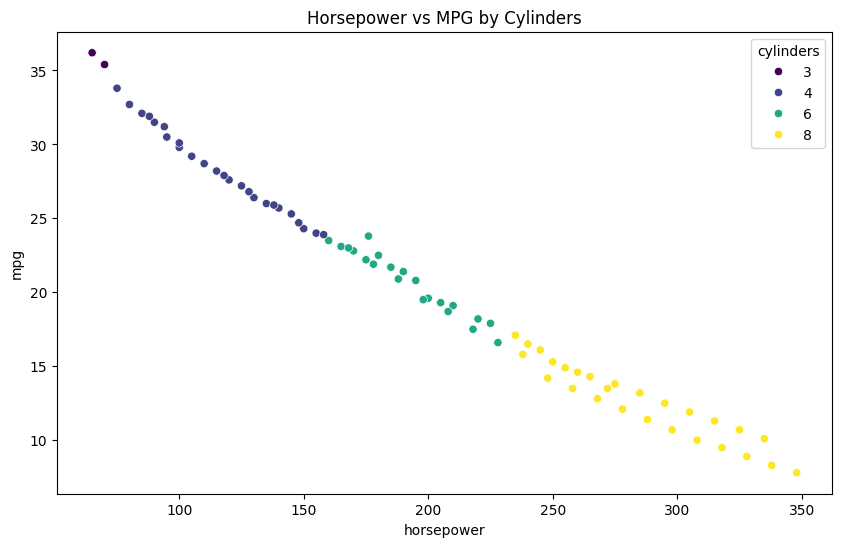

In [20]:
# Visualize horsepower vs MPG
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='horsepower', y='mpg', hue='cylinders', palette='viridis')
plt.title('Horsepower vs MPG by Cylinders')
plt.show()

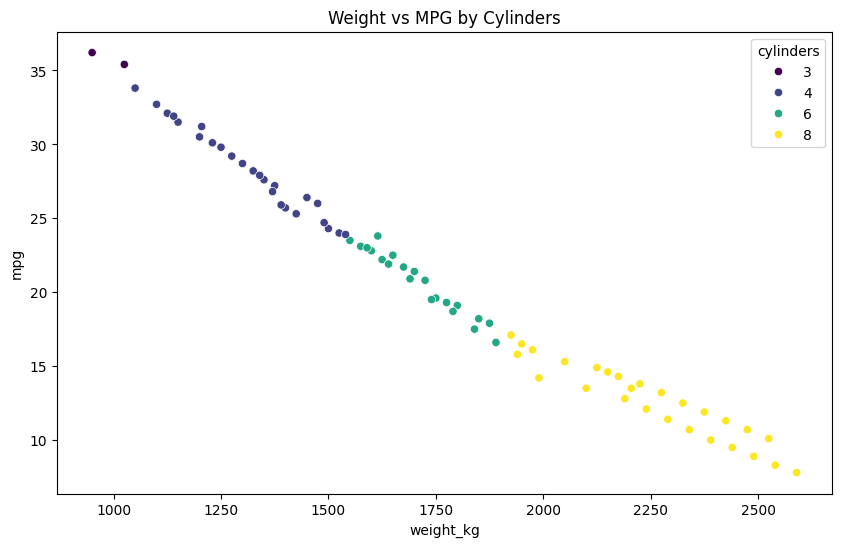

In [21]:
# Visualize weight vs MPG
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='weight_kg', y='mpg', hue='cylinders', palette='viridis')
plt.title('Weight vs MPG by Cylinders')
plt.show()

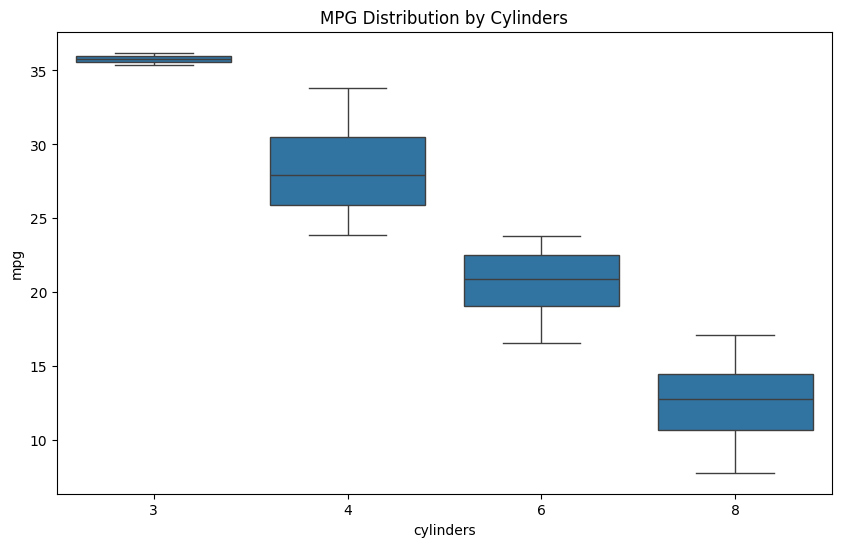

In [22]:
# Visualize MPG distribution by cylinders
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cylinders', y='mpg')
plt.title('MPG Distribution by Cylinders')
plt.show()

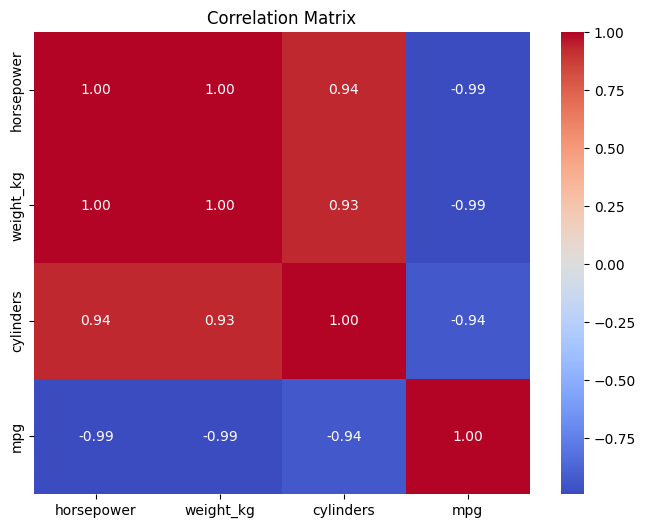

In [23]:
# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### 5. Prepare Features and Target

Let's separate features (X) and target variable (y).

In [24]:
X = df[['horsepower', 'weight_kg', 'cylinders']]
y = df['mpg']
print(f"Feature shape: {X.shape}, Target shape: {y.shape}")

Feature shape: (75, 3), Target shape: (75,)


### 6. Split Data for Training and Testing

We split the data into training (80%) and testing (20%) sets.

In [25]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Training samples: 60, Testing samples: 15


### 7. Train the Model

We'll train a linear regression model to predict MPG.

In [26]:
# Import and train the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients
features = X.columns
coefficients = model.coef_
intercept = model.intercept_

print(f"Intercept: {intercept:.4f}")
for feature, coef in zip(features, coefficients):
    print(f"Coefficient for {feature}: {coef:.4f}")

Intercept: 40.8100
Coefficient for horsepower: -0.0795
Coefficient for weight_kg: -0.0017
Coefficient for cylinders: -0.2424


### 8. Make Predictions

Let's use our model to predict MPG for the test set.

In [27]:
# Make predictions
y_pred = model.predict(X_test)

# Compare a few predictions with actual values
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
comparison_df.head(10)

,Actual,Predicted
0,22.5,22.217319
1,12.1,12.928518
2,16.5,16.446921
3,30.5,30.232759
4,19.3,20.014993
5,13.5,14.758726
6,17.1,16.887386
7,27.6,27.987716
8,8.3,7.642937
9,11.4,12.047588


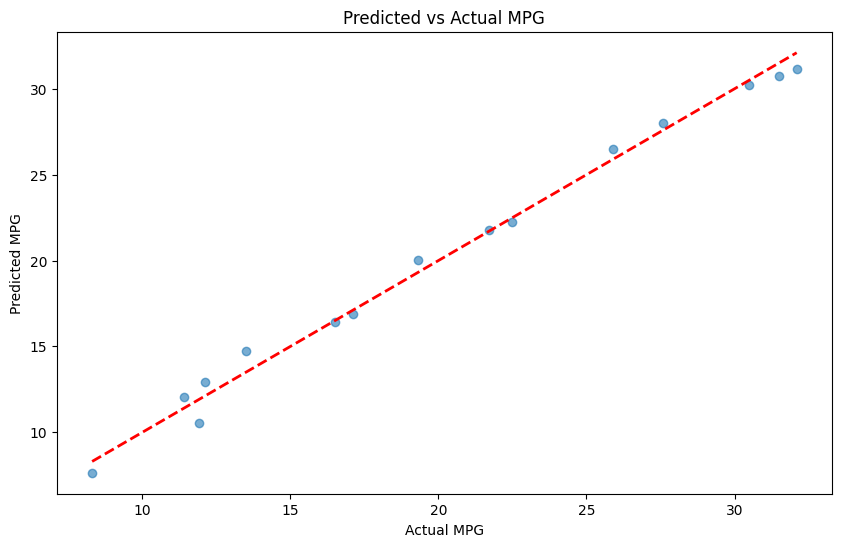

In [28]:
# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Predicted vs Actual MPG')
plt.show()

### 9. Evaluate Model Performance

Let's evaluate the model using multiple metrics.

In [29]:
# Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

R² Score: 0.991
MAE: 0.60
MSE: 0.51
RMSE: 0.71


In [30]:
# Predict MPG for a new car
new_car = pd.DataFrame({
    'horsepower': [150],
    'weight_kg': [1600],
    'cylinders': [6]
})

predicted_mpg = model.predict(new_car)
print(f"Predicted MPG for a car with 150 horsepower, 1600 kg weight, and 6 cylinders: {predicted_mpg[0]:.2f}")

Predicted MPG for a car with 150 horsepower, 1600 kg weight, and 6 cylinders: 24.69


### 10. Summary

In this exercise, we built a linear regression model to predict car fuel efficiency (MPG) based on horsepower, weight, and number of cylinders. We:

* Loaded and explored the dataset
* Visualized relationships between features and MPG
* Split the data into training and testing sets
* Trained a linear regression model
* Made predictions and evaluated the model using R², MAE, MSE, and RMSE

The model achieved a good R² score, indicating that it can explain a high percentage of the variance in fuel efficiency. The negative coefficients for horsepower, weight, and cylinders confirm that heavier cars with more powerful engines and more cylinders tend to have lower fuel efficiency.

---